# DICer: Directed Interaction Caller

We integrated all modules into a single script that evaluates, categorizes and selects directed and undirected reference interactions at a chosen FDR threshold. The script can be executed as follows:

[INFO] Input parameters
	[INFO] --out-prefix: DEMO_1
	[INFO] --description-tag: DEMO 1
	[INFO] --diachromatic-interaction-file:
		[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] --min-inter-dist: 20,000
	[INFO] --p-value-threshold: None
		[INFO] Will determine a P-value threshold so that the FDR is kept below: 0.05
		[INFO] --fdr-threshold: 0.05000
		[INFO] --nominal-alpha-max: 0.02500
		[INFO] --nominal-alpha-step: 0.00001
		[INFO] --iter-num: 100
		[INFO] --random-seed: 0
		[INFO] --thread-num: 2
		[INFO] Use '--fdr-threshold' to set your own FDR threshold.
		[INFO] Or use '--p-value-threshold' to skip the FDR procedure.

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] Set size: 54,742
[INFO] ... done.

[INFO] Performing randomization analysis with 100 iterations ...
	[INFO] Determining number of significant interactions at each nominal alpha ...
	[INFO] R

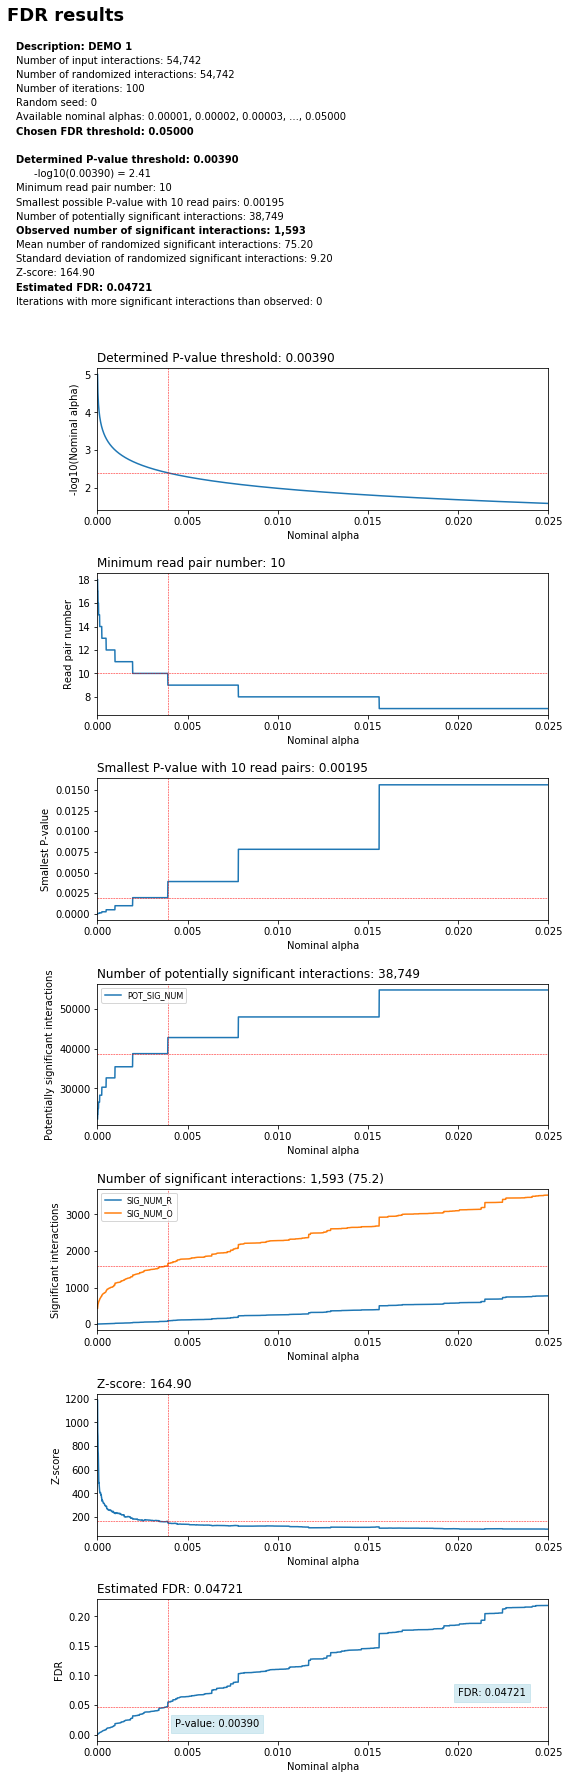

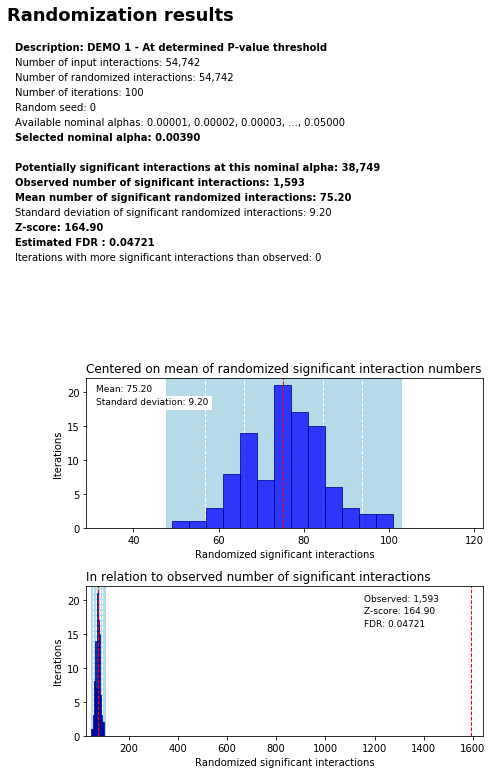

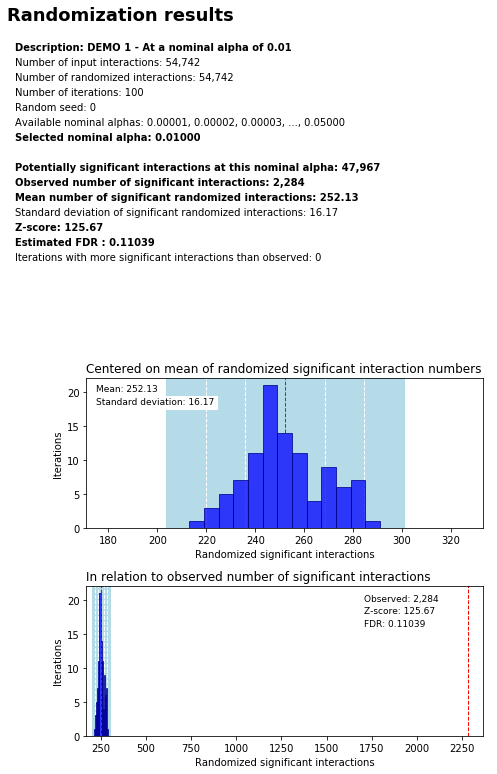

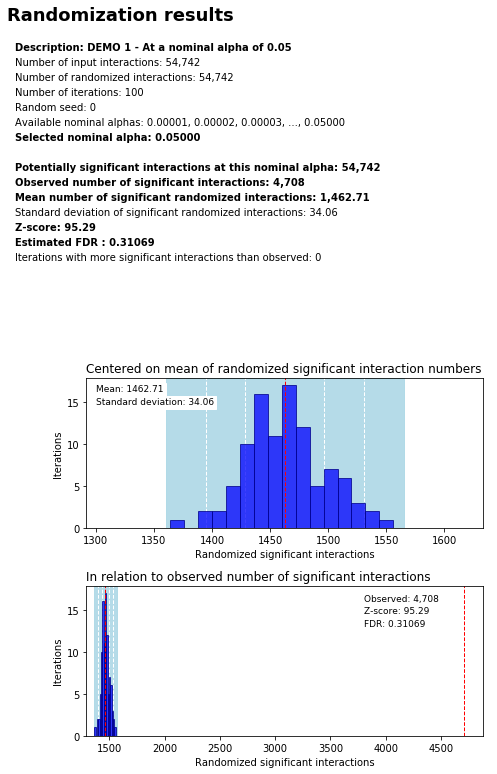

In [12]:
%run ../DICer.py \
--out-prefix DEMO_1 \
--description-tag "DEMO 1" \
--diachromatic-interaction-file ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz \
--min-inter-dist 20000 \
--fdr-threshold 0.05 \
--nominal-alpha-max 0.02500 \
--nominal-alpha-step 0.00001 \
--iter-num 100 \
--random-seed 0 \
--thread-num 2

## Command line arguments

- ``--out-prefix <String>``  
Common prefix for all generated files, which can also contain a path.
- ``--description-tag <String>``  
Short description that appears in generated tables and plots.
- ``--diachromatic-interaction-file <String>``  
Input file in Diachromatic interaction format.
- ``--min-inter-dist <Integer>``  
Minimal interaction distance
- ``--fdr-threshold <Float>``  
The P-value is chosen so that the estimated FDR remains below this threshold.
- ``--nominal-alpha-max <Float>``  
Maximum nominal alpha at which iteractions are classified as significant.
- ``--nominal-alpha-step <Float>``  
Step size for nominal alphas.
- ``--iter-num <Integer>``  
Number of randomizations that will be performed.
- ``--random-seed <Integer>``  
Random seed that is used for the first iteration. The random seed is incremented by ``1`` for each further iteration.
- ``--thread-num <Integer>``  
Number of processes in which the iterations are performed in batches of the same size.
- ``--p-value-threshold <Float>``  
By default, the final P-value threshold is determined via randomization. If a P-value is specified, then this P-value threshold will be used and no randomizations will be performed.

## Generated files

DICer generates a total of seven files:

- ``DEMO_1_reports.txt``
- ``DEMO_1_randomization_plot.pdf``
- ``DEMO_1_randomization_table.txt``
- ``DEMO_1_randomization_histogram_at_threshold.pdf``
- ``DEMO_1_randomization_histogram_at_001.pdf``
- ``DEMO_1_randomization_histogram_at_005.pdf``
- ``DEMO_1_evaluated_and_categorized_interactions.tsv.gz``

### ``DEMO_1_reports.txt``

This file contains a report on each individual processing step.

In [13]:
cat DEMO_1_reports.txt

[INFO] Input parameters
	[INFO] --out-prefix: DEMO_1
	[INFO] --description-tag: DEMO 1
	[INFO] --diachromatic-interaction-file:
		[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] --min-inter-dist: 20,000
	[INFO] --p-value-threshold: None
		[INFO] Will determine a P-value threshold so that the FDR is kept below: 0.05
		[INFO] --fdr-threshold: 0.05000
		[INFO] --nominal-alpha-max: 0.02500
		[INFO] --nominal-alpha-step: 0.00001
		[INFO] --iter-num: 100
		[INFO] --random-seed: 0
		[INFO] --thread-num: 2
		[INFO] Use '--fdr-threshold' to set your own FDR threshold.
		[INFO] Or use '--p-value-threshold' to skip the FDR procedure.

[INFO] Report on reading files:
	[INFO] Read interaction data from 1 files:
		[INFO] 64,000 interactions from: 
			[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
			[INFO] Minimum number of read pairs: 7
			[INFO] Skipped because less than 7 read pairs: 9,258
			[INFO] Skipped because shorter t

The results are output with explanations, followed by corresponding tab separated rows that can be inserted into a table. The first columns contain tags that can be used to extract rows for individual processing steps.

For example, the following command can be used to extract the rows with the results of the randomizations:

In [3]:
cat DEMO_1_reports.txt | grep ':TR_RANDOM:'

:TR_RANDOM:	DESCRIPTION	INPUT_I_NUM	ITER_NUM	RANDOM_SEED	NOMINAL_ALPHA	POT_SIG_NUM	SIG_NUM_O	SIG_NUM_R_MEAN	SIG_NUM_R_SD	Z_SCORE	FDR	SIG_NUM_R_GT_OBS
:TR_RANDOM:	DEMO_1	54742	100	0	0.00390	38749	1593	75.20	9.20	164.90	0.04721	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.01000	47967	2284	252.13	16.17	125.67	0.11039	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.05000	54742	4708	1462.71	34.06	95.29	0.31069	0


Two rows are output for the randomizations. One row for the nominal alpha, which is used as the P-value threshold, and another row for a nominal alpha of ``0.01``. The second row is intended to compare different datasets at a fixed nominal alpha. In this example, a P-value threshold of ``0.00390`` was determined. At this threshold, ``1593`` interactions are significant and the FDR is ``0.04721``. If interactions were selected at a threshold of ``0.01``, the FDR would be ``0.11039``.

The following command can be used to extract the rows for the evaluation and categorization at the determined P-value threshold:

In [4]:
cat DEMO_1_reports.txt | grep ':TR_EVAL_CAT:'

:TR_EVAL_CAT:	DESCRIPTION	PVAL_THRESH	MIN_RP	MIN_RP_PVAL	N_PROCESSED	N_DISCARDED	N_UNDIRECTED	N_DIRECTED
:TR_EVAL_CAT:	DEMO_1	0.00390	10	0.00195	54742	15993	37156	1593


We discard interactions that do not have enough read pairs in order to be significant, i.e. that even the most extreme observations (zero simple or zero twisted read pairs) have a P-value that is above the determined threshold. In this example, at least ``10`` read pairs are required for significance and ``25251`` were discarded because they have fewer read pairs. ``37156`` interactions have enough read pairs, but are not significant. We refer to these interactions as *undirected interactions* and to the remaining ``1593`` as *directed interactions*.

The following command can be used to extract the rows for the selection of undirected reference interactions:

In [5]:
cat DEMO_1_reports.txt | grep ':TR_SELECT:'

:TR_SELECT:	DESCRIPTION	DI_NN	DI_NE	DI_EN	DI_EE	DI_TOTAL	UIR_NN	UIR_NE	UIR_EN	UIR_EE	UIR_TOTAL	M_UIR_NN	M_UIR_NE	M_UIR_EN	M_UIR_EE	M_UIR_TOTAL	UI_NN	UI_NE	UI_EN	UI_EE	UI_TOTAL
:TR_SELECT:	DEMO_1	19	787	706	81	1593	16	765	678	57	1516	3	22	28	24	77	836	16374	16961	1469	35640


We compare properties of directed interactions (``DI``) with those of undirected reference interactions (``UIR``) that are comparable with respect to the read pair numbers per interaction. When selecting undirected reference interactions, we take into account the enrichment status of digests (``E`` for enriched and ``N`` for not enriched), because we aassume that these have an influence on the read pair number of interactions. An interaction can have four different enrichment states: ``NN``,``NE``,``EN`` or ``EE``. We first determine the read pair numbers of directed interactions in these four categories and then try to select undirected reference interactions with the same read pair numbers in each category. In this example, there are ``19``,``787``,``706`` and ``81`` directed interactions in the categories ``NN``,``NE``,``EN`` or ``EE``, which together gives ``1593``. For some read pair numbers, there are no matching reference interactions. For example, only ``16`` out of ``19`` reference interactions could be selected in the category ``NN``. The columns for directed and undirected interactions are followed by analogous columns for missing reference interactions (``M_UIR``) and undirected interactions (``UI``).

### ```DEMO_1_randomization_plot.pdf```

This file shows the results for all nominal alphas (``1 * nominal-alpha-step, 2 * nominal-alpha-step, ..., nominal-alpha-max``). It consists of a header that contains the input arguments as well as the results for the determined P-value threshold and seven plots:

1. **P-value thresholds**  
In this plot, the nominal alphas are plotted agains the logarithmized nominal alphas. Red dashed lines are shown for the largest nominal alpha with an estimated FDR below the chosen threshold.

2. **Minimum read pair numbers**  
For a given nominal alpha, a certain minimum number of read pairs is required for significance of interactions. 

3. **Smallest P-value with minimum read pair number**  
The smallest possible P-value with minimum number of read pairs required for significance.

4. **Number of potentially significant interactions**  
Number of interactions that have enough read pairs in order to be significant.

5. **Number of significant interactions**  
The numbers before randomization are shown in orange and the numbers after randomization in blue.

6. **Z-score**  
The Z-scores are calculated from the actually observed number of significant interactions and the mean and standard deviation of the numbers of randomized significant interactions.

7. **Estimated FDR**  
The estimated FDR is the ratio of the mean number of ranndomized interactions (over all iterations) and the observed number of interactions.

In [14]:
from IPython.display import IFrame
IFrame("./DEMO_1_randomization_plot.pdf", width=1000, height=500)

### ``DEMO_1_randomization_table.txt``

This file contains a table with the values shown in ``DEMO_1_randomization_plot.pdf``.

In [16]:
!head -n 10 DEMO_1_randomization_table.txt

:TR_RANDOM:	DESCRIPTION	INPUT_I_NUM	ITER_NUM	RANDOM_SEED	NOMINAL_ALPHA	POT_SIG_NUM	SIG_NUM_O	SIG_NUM_R_MEAN	SIG_NUM_R_SD	Z_SCORE	FDR	SIG_NUM_R_GT_OBS
:TR_RANDOM:	DEMO_1	54742	100	0	0.00001	22367	433	0.13	0.36	1186.50	0.00030	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00002	23607	492	0.29	0.53	919.61	0.00059	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00003	23607	522	0.35	0.59	884.92	0.00067	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00004	24992	555	0.53	0.73	762.27	0.00095	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00005	24992	569	0.61	0.77	735.08	0.00107	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00006	24992	580	0.72	0.90	647.01	0.00124	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00007	26577	614	1.18	1.11	553.10	0.00192	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00008	26577	625	1.36	1.28	488.41	0.00218	0
:TR_RANDOM:	DEMO_1	54742	100	0	0.00009	26577	630	1.46	1.28	492.55	0.00232	0


### ``DEMO_1_randomization_histogram_at_threshold.pdf``

This file contains two histograms for the total numbers of signnificant randomized interactions at the determined P-value threshold.

In [17]:
from IPython.display import IFrame
IFrame("./DEMO_1_randomization_histogram_at_threshold.pdf", width=1000, height=500)

### ``DEMO_1_randomization_histogram_at_001.pdf``

This file contains a histogram for the numbers significant randomized interactions at a P-value threshold of ``0.01``.

In [18]:
from IPython.display import IFrame
IFrame("./DEMO_1_randomization_histogram_at_001.pdf", width=1000, height=500)

### ``DEMO_1_randomization_histogram_at_005.pdf``

This file contains a histogram for the numbers significant randomized interactions at a P-value threshold of ``0.05``.

In [10]:
from IPython.display import IFrame
IFrame("./DEMO_1_randomization_histogram_at_005.pdf", width=1000, height=500)

### ``DEMO_1_evaluated_and_categorized_interactions.tsv.gz``

This file contains the evaluated and categorized interactions.

In [19]:
!gunzip DEMO_1_evaluated_and_categorized_interactions.tsv.gz
!head DEMO_1_evaluated_and_categorized_interactions.tsv
!gzip DEMO_1_evaluated_and_categorized_interactions.tsv

chr4	102559481	102562265	N	chr4	102834175	102837626	E	7:8	0.00	UIR
chr11	114362648	114362686	N	chr11	114396073	114404234	E	15:11	0.25	UIR
chr15	56158017	56158267	N	chr15	56462978	56465983	E	11:14	0.16	UIR
chr2	132404430	132407195	E	chr2	133944342	133945427	N	7:6	0.00	UIR
chr6	89716777	89716882	N	chr6	89916736	89920828	E	0:21	6.02	DI
chr5	148169369	148171652	E	chr5	148544614	148551217	N	9:16	0.64	UIR
chr7	43316988	43319996	N	chr7	43522451	43533844	E	5:9	0.37	UIR
chr13	94169131	94174190	N	chr13	94463964	94468140	E	15:18	0.14	UIR
chr6	32572556	32579030	N	chr6	32665661	32669176	E	6:21	2.23	UIR
chr2	16841469	16846902	E	chr2	17018322	17019298	N	21:19	0.06	UIR
